##Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

##Veri okuma

In [ ]:
!git clone https://github.com/kinivi/Activity-recognition-on-MHEALTH.git

Cloning into 'Activity-recognition-on-MHEALTH'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 73.48 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking out files: 100% (25/25), done.


In [ ]:
df=[]
for i in range(1,11):
  df.append(pd.read_csv ('/content/Activity-recognition-on-MHEALTH/data/subject_{}.txt'.format(i),delimiter=" ", header=None, dtype=np.float64))

#Veri Ön işleme

In [ ]:
columns=['acceleration_from_the_chest_sensor_X_axis',
'acceleration_from_the_chest_sensor_Y_axis',
'acceleration_from_the_chest_sensor_Z_axis',
'electrocardiogram_signal_lead_1',
'electrocardiogram_signal_lead_2',
'acceleration_from_the_left_ankle_sensor_X_axis',
'acceleration_from_the_left_ankle_sensor_Y_axis',
'acceleration_from_the_left_ankle_sensor_Z_axis',
'gyro_from_the_left_ankle_sensor_X_axis',
'gyro_from_the_left_ankle_sensor_Y_axis',
'gyro_from_the_left_ankle_sensor_Z_axis',
'magnetometer_from_the_left_ankle_sensor_X_axis',
'magnetometer_from_the_left_ankle_sensor_Y_axis',
'magnetometer_from_the_left_ankle_sensor_Z_axis',
'acceleration_from_the_right_lower_arm_sensor_X_axis',
'acceleration_from_the_right_lower_arm_sensor_Y_axis',
'acceleration_from_the_right_lower_arm_sensor_Z_axis',
'gyro_from_the_right_lower_arm_sensor_X_axis',
'gyro_from_the_right_lower_arm_sensor_Y_axis',
'gyro_from_the_right_lower_arm_sensor_Z_axis',
'magnetometer_from_the_right_lower_arm_sensor_X_axis',
'magnetometer_from_the_right_lower_arm_sensor_Y_axis',
'magnetometer_from_the_right_lower_arm_sensor_Z_axis','Label']

In [ ]:
for i in df:
  i.columns=columns

0 ile etiketli veriler herhangi bir sınıfa ait olmayan verileri ifade ediyor bunları dataframeden temizleyelim.

In [ ]:
for i in range(10):
  df[i]=df[i][df[i]['Label'] != 0]



Veri setimde yer alan 12 aktivite ve Sınıf etiketi değerleri 

Standing (Ayakta durma)=1

Sitting (Oturma)=2

Lying (Uzanma)=3

Walking (Yürüme)=4

Upstairs (Merdiven çıkma)=5

Waistforward (bel öne ) =6 

Armlift (Kollar yukarı )=7

Kneebend (diz çökme)=8

Cycling (Bisiklet sürme)=9

Jogging (Hızlı yürüme)=10

Running (Koşma) =11

Jumping (Zıplama)=12

şeklinde temsil ediliyor. 

Aktiviteleri artan aktivite sınıf etiketine göre sıralama 

In [ ]:
for i in range(10):
  df[i]= df[i].sort_values(by = ['Label'], ignore_index=True)

In [ ]:
df[0]

,acceleration_from_the_chest_sensor_X_axis,acceleration_from_the_chest_sensor_Y_axis,acceleration_from_the_chest_sensor_Z_axis,electrocardiogram_signal_lead_1,electrocardiogram_signal_lead_2,acceleration_from_the_left_ankle_sensor_X_axis,acceleration_from_the_left_ankle_sensor_Y_axis,acceleration_from_the_left_ankle_sensor_Z_axis,gyro_from_the_left_ankle_sensor_X_axis,gyro_from_the_left_ankle_sensor_Y_axis,...,acceleration_from_the_right_lower_arm_sensor_X_axis,acceleration_from_the_right_lower_arm_sensor_Y_axis,acceleration_from_the_right_lower_arm_sensor_Z_axis,gyro_from_the_right_lower_arm_sensor_X_axis,gyro_from_the_right_lower_arm_sensor_Y_axis,gyro_from_the_right_lower_arm_sensor_Z_axis,magnetometer_from_the_right_lower_arm_sensor_X_axis,magnetometer_from_the_right_lower_arm_sensor_Y_axis,magnetometer_from_the_right_lower_arm_sensor_Z_axis,Label
0,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.45170,0.37683,-0.20965,-0.88931,...,-2.8439,-9.06180,1.81770,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1.0
1,-9.7829,0.25368,1.21230,0.016745,0.004186,2.4987,-9.48920,0.58178,-0.21892,-0.86679,...,-2.6697,-9.10310,1.69070,-0.049020,-0.93634,-0.35991,0.714510,-0.36272,0.73994,1.0
2,-9.5425,0.35627,1.29520,0.025118,0.012559,2.4155,-9.32070,0.59979,-0.21892,-0.86679,...,-3.0288,-9.01370,1.63260,-0.078431,-0.91992,-0.36207,0.184890,0.53538,-0.72368,1.0
3,-9.8172,0.45529,1.21990,0.016745,-0.008373,2.4778,-9.54970,0.47438,-0.21892,-0.86679,...,-3.0376,-9.12370,1.62710,-0.078431,-0.91992,-0.36207,0.188480,0.89467,-1.08820,1.0
4,-9.7516,0.70908,1.15860,0.020931,0.004186,2.2949,-9.54890,0.55592,-0.21892,-0.86679,...,-3.1612,-9.16570,1.42710,-0.078431,-0.91992,-0.36207,0.014408,1.44080,-1.09720,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35169,-5.5533,4.93790,-4.39770,0.113030,-0.941920,19.6160,-19.33800,-18.93700,0.36549,-0.74296,...,-6.8808,-0.41833,3.16660,-0.549020,0.11704,0.95905,2.469000,-22.39900,-5.14180,12.0
35170,-4.3321,-0.56575,-0.28250,0.071167,-1.017300,6.2929,-9.99130,-1.11370,0.37848,-0.73734,...,-6.2954,-1.18760,2.24270,-0.601960,0.17043,0.91379,-2.105500,-31.01700,-18.50500,12.0
35171,-2.4721,-0.13404,1.84060,0.188380,-0.791210,15.1120,0.12468,15.43900,0.37848,-0.73734,...,-5.9189,-1.99700,2.29600,-0.601960,0.17043,0.91379,-9.982600,-46.73400,-37.27700,12.0
35172,7.6985,-1.08690,-0.78203,0.339090,-0.636320,2.4481,-13.97900,-3.86200,0.30427,-0.71670,...,19.3620,-3.10040,-7.04040,-0.323530,0.27515,1.03450,37.873000,-72.65200,86.68300,12.0


Eğitim ve test olarak ayırma: 8 kişi eğitim 2 kişi test

In [ ]:
X_test_list=df[0:2]
X_train_list=df[2:]

Liste şeklindeki df leri tek bir df olacak şekilde birleştirdim.

In [ ]:
X_test=pd.concat(X_test_list)
X_train=pd.concat(X_train_list)

In [ ]:
X_train

,acceleration_from_the_chest_sensor_X_axis,acceleration_from_the_chest_sensor_Y_axis,acceleration_from_the_chest_sensor_Z_axis,electrocardiogram_signal_lead_1,electrocardiogram_signal_lead_2,acceleration_from_the_left_ankle_sensor_X_axis,acceleration_from_the_left_ankle_sensor_Y_axis,acceleration_from_the_left_ankle_sensor_Z_axis,gyro_from_the_left_ankle_sensor_X_axis,gyro_from_the_left_ankle_sensor_Y_axis,...,acceleration_from_the_right_lower_arm_sensor_X_axis,acceleration_from_the_right_lower_arm_sensor_Y_axis,acceleration_from_the_right_lower_arm_sensor_Z_axis,gyro_from_the_right_lower_arm_sensor_X_axis,gyro_from_the_right_lower_arm_sensor_Y_axis,gyro_from_the_right_lower_arm_sensor_Z_axis,magnetometer_from_the_right_lower_arm_sensor_X_axis,magnetometer_from_the_right_lower_arm_sensor_Y_axis,magnetometer_from_the_right_lower_arm_sensor_Z_axis,Label
0,-9.6105,-0.28093,0.301030,-0.272110,0.008373,-0.51876,-9.7359,1.6538,-0.44156,-0.62101,...,-2.3401,-9.4983,1.17090,-0.83725,-0.65092,0.176720,0.54221,0.36124,0.36824,1.0
1,-9.7118,-0.26754,-0.129340,-0.715860,-0.255360,-0.36911,-9.7694,1.2787,-0.45455,-0.64353,...,-2.3768,-9.0841,1.58750,-0.82745,-0.66735,0.088362,-1.98210,-0.72812,-2.19840,1.0
2,-9.6785,-0.41743,-0.258620,-0.686550,-0.246990,-0.38893,-9.7988,1.3083,-0.45826,-0.63977,...,-2.5177,-9.3330,1.70000,-0.82745,-0.66735,0.088362,-1.61760,-0.18367,-1.83560,1.0
3,-9.6637,-0.65234,0.014973,-0.665620,-0.242800,-0.42949,-9.8485,1.2845,-0.45826,-0.63977,...,-2.8668,-9.4363,1.37190,-0.82745,-0.66735,0.088362,-0.73261,-1.44820,-0.36118,1.0
4,-9.6789,-0.40020,0.037667,-0.648870,-0.226060,-0.46841,-9.9166,1.4057,-0.45826,-0.63977,...,-2.7557,-9.4765,1.34910,-0.83922,-0.65503,0.073276,-0.20485,-2.53140,0.74324,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33685,-12.2050,-0.87355,-5.657600,-0.967030,-0.900050,-0.74641,-19.3500,-8.2771,0.71985,-0.43715,...,-17.0850,-18.6100,9.04870,-0.19804,-1.00000,0.480600,-10.19200,-31.79800,40.54700,12.0
33686,-3.8731,-2.80780,-1.884300,-0.133960,-0.188380,-5.46890,-19.3680,-9.1169,0.71985,-0.43715,...,-11.8450,-18.6160,6.37130,-0.19804,-1.00000,0.480600,-2.72920,-3.62070,-1.82340,12.0
33687,6.8277,-1.48780,2.076600,-0.293040,-0.280480,-8.10290,-19.3280,-4.1099,0.71058,-0.62664,...,-7.9173,-16.4260,4.38700,-0.19804,-1.00000,0.480600,1.06300,16.53500,-51.40800,12.0
33688,-1.6929,1.81880,0.268950,-0.058608,0.037677,3.18610,1.5183,-12.5280,0.71800,-0.58912,...,3.1073,5.6155,-0.44839,-0.42353,-1.00820,0.262930,15.33200,-10.80700,23.51900,12.0


In [ ]:
def overlapping_windowing(X_Dataframe,windows_length,shift):
  acceleration_from_the_chest_sensor_X_axis=[]
  acceleration_from_the_chest_sensor_Y_axis=[]
  acceleration_from_the_chest_sensor_Z_axis=[]
  labels = []
  for k in range(0, X_Dataframe.shape[0] - windows_length, shift):
    x=X_Dataframe['acceleration_from_the_chest_sensor_X_axis'][k:k + windows_length]
    y=X_Dataframe['acceleration_from_the_chest_sensor_Y_axis'][k:k + windows_length]
    z=X_Dataframe['acceleration_from_the_chest_sensor_Z_axis'][k:k + windows_length]
    label = stats.mode(X_Dataframe['Label'][k: k + windows_length])[0][0]# incelenen pencere genişliği boyunca en yoğunlukta bulunan etiket değerini döndürür 
    acceleration_from_the_chest_sensor_X_axis.append(x)
    acceleration_from_the_chest_sensor_Y_axis.append(y)
    acceleration_from_the_chest_sensor_Z_axis.append(z)
    labels.append(label)
  return acceleration_from_the_chest_sensor_X_axis,acceleration_from_the_chest_sensor_Y_axis,acceleration_from_the_chest_sensor_Z_axis,labels                               

Pencerelenmiş şekilde x y z ekseninde pencereleri elde ettim

In [ ]:
x,y,z,label=overlapping_windowing(X_train,100,50)

In [ ]:
x[0]

0    -9.6105
1    -9.7118
2    -9.6785
3    -9.6637
4    -9.6789
       ...  
95   -9.7165
96   -9.7344
97   -9.4712
98   -9.5523
99   -9.6378
Name: acceleration_from_the_chest_sensor_X_axis, Length: 100, dtype: float64

Her pencerinin uzunluğu 100 ve %50 örtüşme var

Şimdi bu pencereleri kullanarak öznitelik çıkarma fonksiyonuyla öznteliklerimizi çıkaralım

In [ ]:
def rms(input_signal):
  c=0
  for i in input_signal:
    c+=pow(i,2)
  x=(c)/(input_signal.size)  
  return np.sqrt(x)
def extract_feature(axis_list):
  from scipy.stats import skew,kurtosis,variation
  from numpy import std
  from statistics import median,mean
  import pandas as pd
  temp=[]
  result=[]
  for i in axis_list:
    temp.append(skew(i))
    temp.append(kurtosis(i))
    temp.append(variation(i))
    temp.append(median(i))
    temp.append(mean(i))
    temp.append(max(i))
    temp.append(min(i))
    temp.append(std(i))
    temp.append(rms(i))
    result.append(temp)
    temp=[]
  result=pd.DataFrame(result)
  columns=['skewness','kurtosis','variation',
           'median','mean','max','min','std','rms']
  result.columns=columns                            
  return result  

Fonksiyon girdi olarak az önce elde ettiğimiz pencerelenmiş listeleri alır ve öznitelikleri hesaplayarak df şeklinde geri dönüş yapar.

In [ ]:
extract_feature(x)

,skewness,kurtosis,variation,median,mean,max,min,std,rms
0,-0.012547,-0.394987,-0.013768,-9.71655,-9.714999,-9.3844,-10.060,0.133752,9.715920
1,-0.041085,-0.028834,-0.017141,-9.71700,-9.722556,-9.3693,-10.191,0.166656,9.723984
2,-0.077778,0.177324,-0.017753,-9.70215,-9.697289,-9.2562,-10.191,0.172154,9.698817
3,-0.104390,1.538242,-0.018206,-9.70915,-9.721228,-9.1432,-10.303,0.176989,9.722839
4,0.756058,2.586207,-0.024035,-9.71220,-9.717910,-8.7213,-10.303,0.233570,9.720717
...,...,...,...,...,...,...,...,...,...
5443,-0.138604,-1.601254,-1.246833,-4.37185,-8.536287,8.8017,-21.983,10.643322,13.643625
5444,-0.237594,-1.550822,-1.306850,-2.37595,-8.067909,8.4555,-21.968,10.543551,13.276205
5445,-0.746452,-0.903897,-1.738683,-1.43175,-5.574196,8.4555,-21.935,9.691758,11.180422
5446,-0.193982,-1.655707,-1.261595,-3.05815,-8.544034,8.7116,-22.041,10.779113,13.754628


Üç eksen için hesaplayalım

In [ ]:
axis=[x,y,z]
feature_list=[]
for i in axis:
  feature_list.append(extract_feature(i))
nolabel_features=pd.concat(feature_list,axis=1)
nolabel_features

,skewness,kurtosis,variation,median,mean,max,min,std,rms,skewness,...,rms,skewness,kurtosis,variation,median,mean,max,min,std,rms
0,-0.012547,-0.394987,-0.013768,-9.71655,-9.714999,-9.3844,-10.060,0.133752,9.715920,-0.300702,...,0.384015,0.498520,0.881533,4.714259,0.035743,0.045526,0.65814,-0.55402,0.214621,0.219396
1,-0.041085,-0.028834,-0.017141,-9.71700,-9.722556,-9.3693,-10.191,0.166656,9.723984,-0.095406,...,0.407614,0.062835,-0.609644,1.145824,0.207455,0.207556,0.73776,-0.33266,0.237823,0.315657
2,-0.077778,0.177324,-0.017753,-9.70215,-9.697289,-9.2562,-10.191,0.172154,9.698817,-0.290444,...,0.413679,-0.371316,-0.089588,0.806502,0.283670,0.263320,0.73776,-0.33388,0.212369,0.338287
3,-0.104390,1.538242,-0.018206,-9.70915,-9.721228,-9.1432,-10.303,0.176989,9.722839,0.200218,...,0.497197,0.628660,1.432109,1.154987,0.267265,0.257096,1.28040,-0.39338,0.296942,0.392776
4,0.756058,2.586207,-0.024035,-9.71220,-9.717910,-8.7213,-10.303,0.233570,9.720717,0.230905,...,0.483072,0.740127,0.532582,2.121580,0.174630,0.174390,1.28040,-0.49733,0.369982,0.409021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,-0.138604,-1.601254,-1.246833,-4.37185,-8.536287,8.8017,-21.983,10.643322,13.643625,0.765339,...,2.294049,-0.383587,-1.308431,-1.209150,-2.466850,-4.223884,3.59780,-15.68300,5.107310,6.627655
5444,-0.237594,-1.550822,-1.306850,-2.37595,-8.067909,8.4555,-21.968,10.543551,13.276205,0.978381,...,2.147680,-0.566513,-1.236365,-1.270002,-1.417500,-4.029988,2.59980,-14.83900,5.118094,6.514268
5445,-0.746452,-0.903897,-1.738683,-1.43175,-5.574196,8.4555,-21.935,9.691758,11.180422,-1.141215,...,1.781188,-1.252629,0.412214,-1.648886,-0.627900,-2.791791,2.59980,-16.81600,4.603347,5.383763
5446,-0.193982,-1.655707,-1.261595,-3.05815,-8.544034,8.7116,-22.041,10.779113,13.754628,-0.416017,...,2.249999,-0.611992,-1.038359,-1.223052,-1.789550,-4.389250,2.51410,-16.81600,5.368281,6.934260


Şimdi bu öznitelik vektörümüze sınıf etiketi kolonuna da ekleyelim.

In [ ]:
etiket=pd.DataFrame(label,columns=['Label'])
etiket

,Label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
5443,12.0
5444,12.0
5445,12.0
5446,12.0


In [ ]:
feat_col=['skewness_x','kurtosis_x','variation_x','median_x','mean_x','max_x','min_x','std_x','rms_x',
           'skewness_y','kurtosis_y','variation_y','median_y','mean_y','max_y','min_y','std_y','rms_y',
           'skewness_z','kurtosis_z','variation_z','median_z','mean_z','max_z','min_z','std_z','rms_z','label']

In [ ]:
train_features = pd.concat([nolabel_features,etiket], axis=1)
train_features['Label']=train_features['Label'].astype(int)
train_features.columns=feat_col
train_features

,skewness_x,kurtosis_x,variation_x,median_x,mean_x,max_x,min_x,std_x,rms_x,skewness_y,...,skewness_z,kurtosis_z,variation_z,median_z,mean_z,max_z,min_z,std_z,rms_z,label
0,-0.012547,-0.394987,-0.013768,-9.71655,-9.714999,-9.3844,-10.060,0.133752,9.715920,-0.300702,...,0.498520,0.881533,4.714259,0.035743,0.045526,0.65814,-0.55402,0.214621,0.219396,1
1,-0.041085,-0.028834,-0.017141,-9.71700,-9.722556,-9.3693,-10.191,0.166656,9.723984,-0.095406,...,0.062835,-0.609644,1.145824,0.207455,0.207556,0.73776,-0.33266,0.237823,0.315657,1
2,-0.077778,0.177324,-0.017753,-9.70215,-9.697289,-9.2562,-10.191,0.172154,9.698817,-0.290444,...,-0.371316,-0.089588,0.806502,0.283670,0.263320,0.73776,-0.33388,0.212369,0.338287,1
3,-0.104390,1.538242,-0.018206,-9.70915,-9.721228,-9.1432,-10.303,0.176989,9.722839,0.200218,...,0.628660,1.432109,1.154987,0.267265,0.257096,1.28040,-0.39338,0.296942,0.392776,1
4,0.756058,2.586207,-0.024035,-9.71220,-9.717910,-8.7213,-10.303,0.233570,9.720717,0.230905,...,0.740127,0.532582,2.121580,0.174630,0.174390,1.28040,-0.49733,0.369982,0.409021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,-0.138604,-1.601254,-1.246833,-4.37185,-8.536287,8.8017,-21.983,10.643322,13.643625,0.765339,...,-0.383587,-1.308431,-1.209150,-2.466850,-4.223884,3.59780,-15.68300,5.107310,6.627655,12
5444,-0.237594,-1.550822,-1.306850,-2.37595,-8.067909,8.4555,-21.968,10.543551,13.276205,0.978381,...,-0.566513,-1.236365,-1.270002,-1.417500,-4.029988,2.59980,-14.83900,5.118094,6.514268,12
5445,-0.746452,-0.903897,-1.738683,-1.43175,-5.574196,8.4555,-21.935,9.691758,11.180422,-1.141215,...,-1.252629,0.412214,-1.648886,-0.627900,-2.791791,2.59980,-16.81600,4.603347,5.383763,12
5446,-0.193982,-1.655707,-1.261595,-3.05815,-8.544034,8.7116,-22.041,10.779113,13.754628,-0.416017,...,-0.611992,-1.038359,-1.223052,-1.789550,-4.389250,2.51410,-16.81600,5.368281,6.934260,12


Modeli eğitmek için gerkli özellik vektörünü oluşturduk şimdi modeli test etmek için gerkli özellik vektörünü hesaplayalım

##Test için öznitelik vektörü hesaplama

In [ ]:
X_test

,acceleration_from_the_chest_sensor_X_axis,acceleration_from_the_chest_sensor_Y_axis,acceleration_from_the_chest_sensor_Z_axis,electrocardiogram_signal_lead_1,electrocardiogram_signal_lead_2,acceleration_from_the_left_ankle_sensor_X_axis,acceleration_from_the_left_ankle_sensor_Y_axis,acceleration_from_the_left_ankle_sensor_Z_axis,gyro_from_the_left_ankle_sensor_X_axis,gyro_from_the_left_ankle_sensor_Y_axis,...,acceleration_from_the_right_lower_arm_sensor_X_axis,acceleration_from_the_right_lower_arm_sensor_Y_axis,acceleration_from_the_right_lower_arm_sensor_Z_axis,gyro_from_the_right_lower_arm_sensor_X_axis,gyro_from_the_right_lower_arm_sensor_Y_axis,gyro_from_the_right_lower_arm_sensor_Z_axis,magnetometer_from_the_right_lower_arm_sensor_X_axis,magnetometer_from_the_right_lower_arm_sensor_Y_axis,magnetometer_from_the_right_lower_arm_sensor_Z_axis,Label
0,-9.77880,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-2.84390,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1.0
1,-9.78290,0.25368,1.21230,0.016745,0.004186,2.4987,-9.4892,0.58178,-0.21892,-0.86679,...,-2.66970,-9.1031,1.69070,-0.049020,-0.93634,-0.359910,0.714510,-0.36272,0.73994,1.0
2,-9.54250,0.35627,1.29520,0.025118,0.012559,2.4155,-9.3207,0.59979,-0.21892,-0.86679,...,-3.02880,-9.0137,1.63260,-0.078431,-0.91992,-0.362070,0.184890,0.53538,-0.72368,1.0
3,-9.81720,0.45529,1.21990,0.016745,-0.008373,2.4778,-9.5497,0.47438,-0.21892,-0.86679,...,-3.03760,-9.1237,1.62710,-0.078431,-0.91992,-0.362070,0.188480,0.89467,-1.08820,1.0
4,-9.75160,0.70908,1.15860,0.020931,0.004186,2.2949,-9.5489,0.55592,-0.21892,-0.86679,...,-3.16120,-9.1657,1.42710,-0.078431,-0.91992,-0.362070,0.014408,1.44080,-1.09720,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35527,-11.58800,-4.44410,-13.64200,-0.364210,-0.188380,3.8958,-7.5017,-3.63820,-0.53618,-0.24203,...,-13.95900,-17.4490,5.10670,-0.635290,-0.90349,-0.213360,-9.848200,-51.24600,219.45000,12.0
35528,-21.78700,-2.59360,-0.81237,-0.485610,0.376770,2.3169,-9.8992,-5.76350,-0.53618,-0.24203,...,-13.33300,-12.6670,5.32500,-0.635290,-0.90349,-0.213360,10.091000,-68.05600,209.91000,12.0
35529,-20.98000,5.55650,1.15270,-0.632130,0.113030,3.5118,-11.5980,-7.35730,-0.43043,-0.34897,...,-13.40300,-8.2647,6.53470,-0.388240,-1.04110,-0.331900,15.155000,-82.37600,198.60000,12.0
35530,-0.94827,-0.56611,0.10695,0.246990,0.213500,3.1731,-5.3603,-3.36130,-0.62152,-0.41463,...,0.88631,3.0112,0.11931,-0.947060,-0.54620,0.002155,31.505000,62.55900,7.94680,12.0


In [ ]:
x_test,y_test,z_test,label_test=overlapping_windowing(X_test,100,50)

In [ ]:
test_axis=[x_test,y_test,z_test]
test_feature_list=[]
for i in test_axis:
  test_feature_list.append(extract_feature(i))
test_nolabel_features=pd.concat(test_feature_list,axis=1)
test_nolabel_features

,skewness,kurtosis,variation,median,mean,max,min,std,rms,skewness,...,rms,skewness,kurtosis,variation,median,mean,max,min,std,rms
0,0.306481,0.336590,-0.013765,-9.70770,-9.713465,-9.3130,-9.9978,0.133707,9.714385,-0.012345,...,0.450408,-0.440943,-0.264107,0.109341,1.173950,1.161277,1.3988,0.81149,0.126975,1.168198
1,0.329476,0.059279,-0.014089,-9.73670,-9.730879,-9.3636,-10.0310,0.137100,9.731845,0.256951,...,0.434361,-0.520484,0.008906,0.126956,1.125650,1.103744,1.3927,0.68839,0.140127,1.112603
2,0.277376,-0.406991,-0.014959,-9.73740,-9.725651,-9.3636,-10.0310,0.145491,9.726739,0.091937,...,0.421479,-0.649076,0.609942,0.138759,1.073300,1.053342,1.3670,0.54535,0.146161,1.063434
3,-0.000502,-0.672911,-0.013629,-9.72935,-9.720878,-9.4546,-10.0160,0.132484,9.721781,0.383608,...,0.417544,-0.255657,0.759019,0.146844,1.056000,1.047646,1.4901,0.54535,0.153840,1.058881
4,-0.081497,-0.448907,-0.013501,-9.70260,-9.709646,-9.3900,-10.0270,0.131093,9.710531,0.607895,...,0.413101,0.166834,0.117334,0.148980,1.028900,1.034052,1.4901,0.67357,0.154053,1.045464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,-0.318151,-1.326305,-1.305793,-3.40330,-7.660985,12.9010,-22.2950,10.003657,12.600152,1.796130,...,3.469518,-0.954861,0.958979,-2.531588,-0.623525,-1.622591,6.8930,-14.27700,4.107731,4.416589
1409,-0.095217,-1.538569,-1.156870,-6.64315,-8.944724,9.2998,-21.9430,10.347883,13.677967,0.188458,...,3.067882,-1.002663,1.944250,-3.672087,-0.408640,-0.740512,4.9646,-11.84400,2.719225,2.818251
1410,-0.126901,-1.425996,-1.300098,-5.40215,-7.901411,9.2998,-22.0050,10.272605,12.959889,0.380909,...,4.099940,-1.280133,2.467946,-3.349075,-0.350145,-0.924696,4.9646,-12.47900,3.096876,3.231982
1411,-0.250459,-1.255195,-1.194911,-6.09040,-7.937993,8.4227,-22.0050,9.485197,12.368536,0.403381,...,3.610859,-1.019708,1.979465,-2.424615,-0.645890,-1.289717,5.9424,-12.47900,3.127067,3.382590


In [ ]:
test_etiket=pd.DataFrame(label_test,columns=['Label'])
test_etiket

,Label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1408,12.0
1409,12.0
1410,12.0
1411,12.0


In [ ]:
test_features = pd.concat([test_nolabel_features,test_etiket], axis=1)
test_features['Label']=test_features['Label'].astype(int)
test_features.columns=feat_col
test_features

,skewness_x,kurtosis_x,variation_x,median_x,mean_x,max_x,min_x,std_x,rms_x,skewness_y,...,skewness_z,kurtosis_z,variation_z,median_z,mean_z,max_z,min_z,std_z,rms_z,label
0,0.306481,0.336590,-0.013765,-9.70770,-9.713465,-9.3130,-9.9978,0.133707,9.714385,-0.012345,...,-0.440943,-0.264107,0.109341,1.173950,1.161277,1.3988,0.81149,0.126975,1.168198,1
1,0.329476,0.059279,-0.014089,-9.73670,-9.730879,-9.3636,-10.0310,0.137100,9.731845,0.256951,...,-0.520484,0.008906,0.126956,1.125650,1.103744,1.3927,0.68839,0.140127,1.112603,1
2,0.277376,-0.406991,-0.014959,-9.73740,-9.725651,-9.3636,-10.0310,0.145491,9.726739,0.091937,...,-0.649076,0.609942,0.138759,1.073300,1.053342,1.3670,0.54535,0.146161,1.063434,1
3,-0.000502,-0.672911,-0.013629,-9.72935,-9.720878,-9.4546,-10.0160,0.132484,9.721781,0.383608,...,-0.255657,0.759019,0.146844,1.056000,1.047646,1.4901,0.54535,0.153840,1.058881,1
4,-0.081497,-0.448907,-0.013501,-9.70260,-9.709646,-9.3900,-10.0270,0.131093,9.710531,0.607895,...,0.166834,0.117334,0.148980,1.028900,1.034052,1.4901,0.67357,0.154053,1.045464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,-0.318151,-1.326305,-1.305793,-3.40330,-7.660985,12.9010,-22.2950,10.003657,12.600152,1.796130,...,-0.954861,0.958979,-2.531588,-0.623525,-1.622591,6.8930,-14.27700,4.107731,4.416589,12
1409,-0.095217,-1.538569,-1.156870,-6.64315,-8.944724,9.2998,-21.9430,10.347883,13.677967,0.188458,...,-1.002663,1.944250,-3.672087,-0.408640,-0.740512,4.9646,-11.84400,2.719225,2.818251,12
1410,-0.126901,-1.425996,-1.300098,-5.40215,-7.901411,9.2998,-22.0050,10.272605,12.959889,0.380909,...,-1.280133,2.467946,-3.349075,-0.350145,-0.924696,4.9646,-12.47900,3.096876,3.231982,12
1411,-0.250459,-1.255195,-1.194911,-6.09040,-7.937993,8.4227,-22.0050,9.485197,12.368536,0.403381,...,-1.019708,1.979465,-2.424615,-0.645890,-1.289717,5.9424,-12.47900,3.127067,3.382590,12


#Sınıflandırma Aşaması

Eğitim veri kümesini yukarıda oluşturduğumuz train_features dataframeini kullanarak oluşturduk

In [ ]:
x_tr=train_features[train_features.columns[:-1]]
y_tr=train_features['label']

Aynı şekilde test veri kümesini yukarıda oluşturduğumuz test_features dataframeini kullanarak oluşturduk son sütunu etiket değerlerini içerir

In [ ]:
x_t=test_features[test_features.columns[:-1]]
y_t=test_features['label']

In [ ]:
def scale_encode(X,y):
  min_max_scaler =MinMaxScaler()
  np_scaled = min_max_scaler.fit_transform(X)
  X= pd.DataFrame(np_scaled, columns = X.columns)
  le=LabelEncoder()
  y=le.fit_transform(y)
  y= pd.DataFrame(y,columns=['label'])
  return X,y

Basit bir fonksiyon kullanarak 

In [ ]:
x_tr,y_tr=scale_encode(x_tr,y_tr)
x_t,y_t=scale_encode(x_t,y_t)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.1, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(x_tr.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(12, activation="softmax"))

In [ ]:
early_stopping = EarlyStopping(monitor="loss",patience=5)
opt=Adam(learning_rate=0.0001)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                1792      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)              

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=200,batch_size=50,callbacks=[early_stopping])

Epoch 1/200
99/99 [==============================] - 67s 680ms/step - loss: 2.3748 - accuracy: 0.1989 - val_loss: 2.1644 - val_accuracy: 0.2092
Epoch 2/200
99/99 [==============================] - 0s 4ms/step - loss: 1.9730 - accuracy: 0.3063 - val_loss: 1.6263 - val_accuracy: 0.4312
Epoch 3/200
99/99 [==============================] - 0s 4ms/step - loss: 1.5176 - accuracy: 0.4563 - val_loss: 1.2292 - val_accuracy: 0.6275
Epoch 4/200
99/99 [==============================] - 0s 5ms/step - loss: 1.2303 - accuracy: 0.5172 - val_loss: 1.0207 - val_accuracy: 0.6257
Epoch 5/200
99/99 [==============================] - 0s 5ms/step - loss: 1.0832 - accuracy: 0.5611 - val_loss: 0.8944 - val_accuracy: 0.6862
Epoch 6/200
99/99 [==============================] - 0s 5ms/step - loss: 0.9897 - accuracy: 0.5907 - val_loss: 0.8217 - val_accuracy: 0.6862
Epoch 7/200
99/99 [==============================] - 0s 4ms/step - loss: 0.9070 - accuracy: 0.6221 - val_loss: 0.7502 - val_accuracy: 0.7321
Epoch 8/20

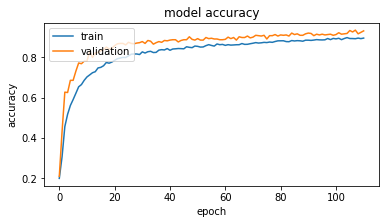

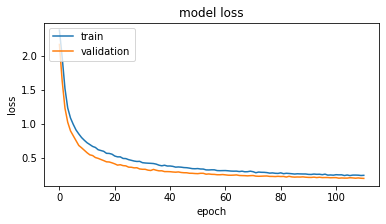

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_t, y_t, verbose=0)
print("Loss:",loss)
print("Accuracy:",accuracy)

Loss: 2.074726104736328
Accuracy: 0.6680821180343628


In [ ]:
y_pred=np.argmax(model.predict(x_t), axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_t, y_pred)

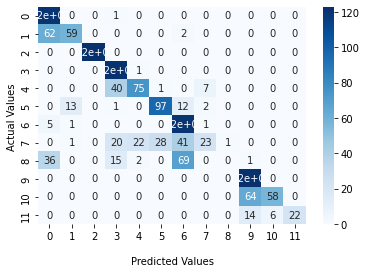

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

Soru: Eğitim ,validasyon ve test veri setleri nedir kısaca açıklayınız.

Cevap--> 
Train veri seti: modelimizi eğitmek için kullandığımız örnekleri temsil eder.

Validasyon veri seti: Model hiperparametrelerini ayarlarken eğitim veri kümesine uygun bir modelin tarafsız bir değerlendirmesini sağlamak için kullandığımız veri örnekleridir.

Test veri seti: Eğitim veri kümesiyle eğittiğimiz nihai modelin tarafsız bir değerlendirmesini sağlamak için kullanılan veri örnekleridir. 

İstatiksel öznitelik çıkarımı için daha fazla bilgiye [adresinden](https://towardsdatascience.com/feature-engineering-on-time-series-data-transforming-signal-data-of-a-smartphone-accelerometer-for-72cbe34b8a60) ulaşabilirsiniz.


